In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'Social_Network_Ads.csv')
df=pd.DataFrame(data)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
x=df.drop(columns=['Purchased'])
y=df['Purchased']

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [7]:
# x=sc.fit_transform(x)
print(x)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)
print("X Train Shape", x_train.shape)
print("X Test Shape", x_test.shape)
print("Y Train Shape", y_train.shape)
print("Y Test Shape", y_test.shape)

X Train Shape (280, 2)
X Test Shape (120, 2)
Y Train Shape (280,)
Y Test Shape (120,)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')


In [10]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [11]:
y_predict=knn.predict(x_test)

In [12]:
print(y_predict)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0]


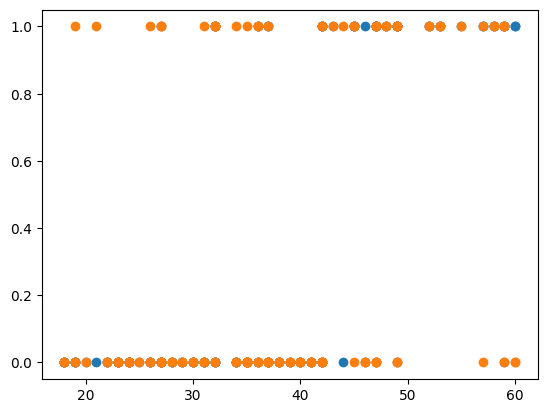

In [13]:
plt.scatter(x=x_test.Age,y=y_test)
plt.scatter(x=x_test.Age,y=y_predict)

[[69 10]
 [11 30]]


<Axes: >

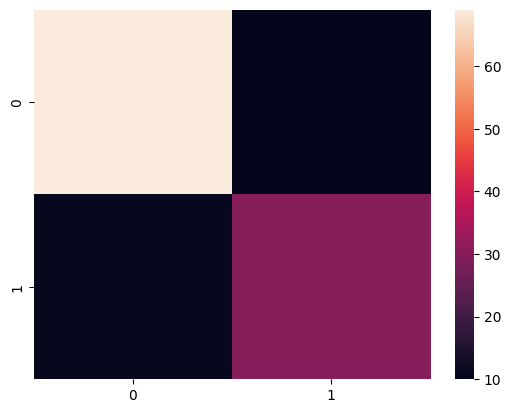

In [14]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cmatrix=confusion_matrix(y_test,y_predict)
print(cmatrix)
sns.heatmap(cmatrix)

In [15]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87        79
           1       0.75      0.73      0.74        41

    accuracy                           0.82       120
   macro avg       0.81      0.80      0.80       120
weighted avg       0.82      0.82      0.82       120



In [16]:
print("Accuracy Score" , accuracy_score(y_test,y_predict)*100)

Accuracy Score 82.5
